# Email Spam Detection using NLP/ML concepts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import time
import string
import re
import numpy as np

In [91]:

from wordcloud import WordCloud
from os import walk
from string import punctuation
from random import shuffle
from collections import Counter
import multiprocessing
import email

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
data = pd.read_csv('emails.csv')
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


### Data Exploration

In [5]:
data1 = data.copy()

In [6]:
data1.shape

(5728, 2)

#### According to the dataset, "1" indicates spam and "0" indicates not spam

In [7]:
data1.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [8]:
data1.describe(include='object')

,text
count,5728
unique,5695
top,"Subject: re : contact info glenn , please , ..."
freq,2


In [9]:
data1.spam.describe(include='object')

count    5728.000000
mean        0.238827
std         0.426404
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: spam, dtype: float64

In [10]:
data1['length']=data1['text'].apply(len)
data1.head()


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


<Axes: ylabel='Frequency'>

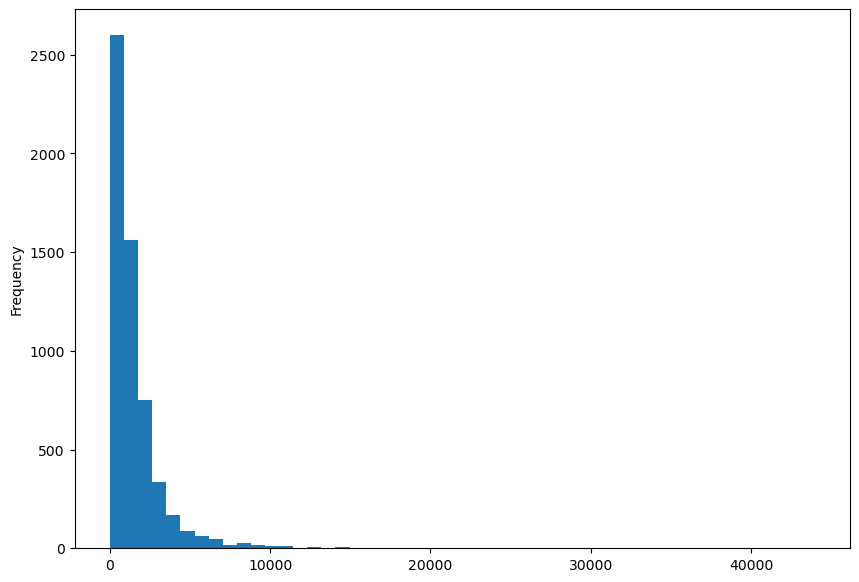

In [11]:
data1['length'].plot(bins=50, kind='hist',figsize=(10,7))

### Dataset Preprocessing

In [12]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [13]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [14]:
df.shape

(5728, 2)

In [15]:
len(df[df['spam']==1])

1368

In [16]:
len(df[df['spam']==0])

4360

In [17]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

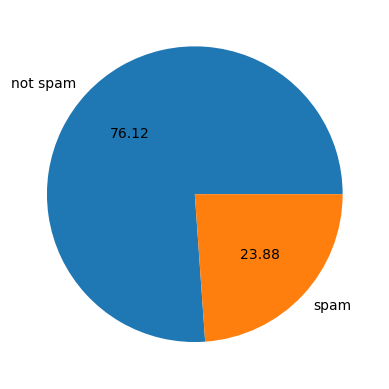

In [18]:
plt.pie(df['spam'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [19]:
df.columns

Index(['text', 'spam'], dtype='object')

### Punctuation removal


In [20]:
# Function to remove punctuations.
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

df["text_clean"] = df["text"].apply(lambda x: remove_punc(x))

df.head()

,text,spam,text_clean
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...


### tokenization

In [21]:

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

df["tokens"] = df["text_clean"].apply(lambda x: tokenize(x))

df.head()

,text,spam,text_clean,tokens
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan..."
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,..."



### removal of stopwords



In [22]:
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords] # to remove all stopwords
    return text

df["text_nonstop"] = df["tokens"].apply(lambda x: remove_stopwords(x))
df.head()

,text,spam,text_clean,tokens,text_nonstop
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,..."


### Stemming


In [23]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

df["text_stemmed"] = df["text_nonstop"].apply(lambda x: stemming(x))
df.head()

,text,spam,text_clean,tokens,text_nonstop,text_stemmed
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri..."
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,..."
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a..."
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co..."


###  Lemmatization


In [24]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

df["text_lemmatized"] = df["text_stemmed"].apply(lambda x: lemmatizer(x))
df.head()

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ...","[subject, natur, irresist, corpor, ident, lt, ..."
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri...","[subject, stock, trade, gunsling, fanni, merri..."
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,...","[subject, unbeliev, new, home, made, easi, im,..."
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a...","[subject, 4, color, print, special, request, a..."
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co...","[subject, money, get, softwar, cd, softwar, co..."


### Explanatory Data Analysis

In [25]:
df['text_len(original)'] = df['text_clean'].apply(lambda x: len(str(x)))
df.head()

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized,text_len(original)
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ...","[subject, natur, irresist, corpor, ident, lt, ...",1348
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri...","[subject, stock, trade, gunsling, fanni, merri...",597
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,...","[subject, unbeliev, new, home, made, easi, im,...",440
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a...","[subject, 4, color, print, special, request, a...",475
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co...","[subject, money, get, softwar, cd, softwar, co...",222


In [26]:
df['text_clean_len'] = df['text_clean'].apply(lambda x: len(str(x)))
df.head()

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized,text_len(original),text_clean_len
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ...","[subject, natur, irresist, corpor, ident, lt, ...",1348,1348
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri...","[subject, stock, trade, gunsling, fanni, merri...",597,597
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,...","[subject, unbeliev, new, home, made, easi, im,...",440,440
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a...","[subject, 4, color, print, special, request, a...",475,475
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co...","[subject, money, get, softwar, cd, softwar, co...",222,222


In [27]:
df['tokens_len'] = df['tokens'].apply(lambda x: len(str(x)))
df.head()

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized,text_len(original),text_clean_len,tokens_len
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ...","[subject, natur, irresist, corpor, ident, lt, ...",1348,1348,1767
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri...","[subject, stock, trade, gunsling, fanni, merri...",597,597,865
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,...","[subject, unbeliev, new, home, made, easi, im,...",440,440,665
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a...","[subject, 4, color, print, special, request, a...",475,475,671
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co...","[subject, money, get, softwar, cd, softwar, co...",222,222,332


In [28]:
df['lemm_len(final)'] = df['text_lemmatized'].apply(lambda x: len(str(x)))
df.head()

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized,text_len(original),text_clean_len,tokens_len,lemm_len(final)
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ...","[subject, natur, irresist, corpor, ident, lt, ...",1348,1348,1767,1119
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri...","[subject, stock, trade, gunsling, fanni, merri...",597,597,865,658
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,...","[subject, unbeliev, new, home, made, easi, im,...",440,440,665,390
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a...","[subject, 4, color, print, special, request, a...",475,475,671,502
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co...","[subject, money, get, softwar, cd, softwar, co...",222,222,332,176


In [29]:
df.columns

Index(['text', 'spam', 'text_clean', 'tokens', 'text_nonstop', 'text_stemmed',
       'text_lemmatized', 'text_len(original)', 'text_clean_len', 'tokens_len',
       'lemm_len(final)'],
      dtype='object')

In [30]:
df[['text_len(original)', 'text_clean_len', 'tokens_len','lemm_len(final)']].describe()

,text_len(original),text_clean_len,tokens_len,lemm_len(final)
count,5728.000000,5728.000000,5728.000000,5728.000000
mean,1472.478701,1472.478701,2090.698499,1373.141934
std,1949.432311,1949.432311,2783.151556,1787.407889
min,12.000000,12.000000,22.000000,22.000000
25%,482.000000,482.000000,692.750000,476.000000
50%,929.000000,929.000000,1326.000000,875.000000
75%,1778.000000,1778.000000,2528.000000,1651.000000
max,42746.000000,42746.000000,62911.000000,39631.000000


In [31]:
# not spam analysis
df[df['spam'] == 0][['text_len(original)', 'text_clean_len', 'tokens_len','lemm_len(final)']].describe()

,text_len(original),text_clean_len,tokens_len,lemm_len(final)
count,4360.000000,4360.000000,4360.000000,4360.000000
mean,1540.220183,1540.220183,2182.012385,1441.825000
std,1864.498156,1864.498156,2650.255180,1734.024365
min,12.000000,12.000000,22.000000,22.000000
25%,544.000000,544.000000,779.000000,516.000000
50%,1055.000000,1055.000000,1502.000000,993.000000
75%,1909.250000,1909.250000,2703.750000,1801.250000
max,42746.000000,42746.000000,62911.000000,39631.000000


In [32]:
# spam analysis
df[df['spam'] == 1][['text_len(original)', 'text_clean_len', 'tokens_len','lemm_len(final)']].describe()

,text_len(original),text_clean_len,tokens_len,lemm_len(final)
count,1368.000000,1368.000000,1368.000000,1368.000000
mean,1256.577485,1256.577485,1799.668860,1154.239766
std,2185.113032,2185.113032,3153.215161,1932.253581
min,15.000000,15.000000,22.000000,22.000000
25%,382.000000,382.000000,552.000000,363.000000
50%,632.000000,632.000000,872.000000,597.500000
75%,1203.000000,1203.000000,1739.000000,1124.000000
max,27305.000000,27305.000000,40699.000000,22003.000000


In [33]:
#Total length removal
print("Original Length:",df['text_len(original)'].sum())
print("Cleaned Length:",df['lemm_len(final)'].sum())
print("Total Words Removed:",(df['text_len(original)'].sum()) - (df['lemm_len(final)'].sum()))

Original Length: 8434358
Cleaned Length: 7865357
Total Words Removed: 569001


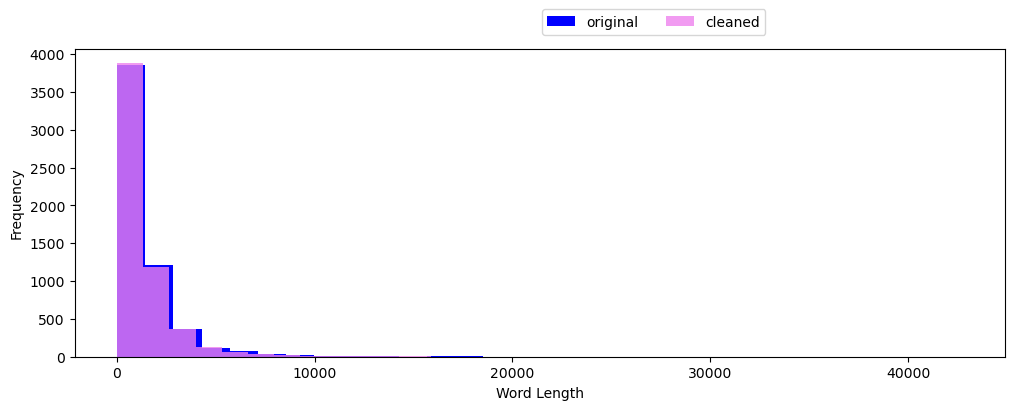

In [34]:
df['text_len(original)'].plot(bins=30, kind='hist',figsize=(12,4),facecolor='blue',linewidth=0.5) ; 
df['lemm_len(final)'].plot(bins=30, kind='hist',figsize=(12,4),alpha =0.8, facecolor = 'violet',linewidth=0.5);
plt.xlabel("Word Length");
plt.legend(['original', 'cleaned'], bbox_to_anchor=(0.75, 1.15), ncol=2);

<Axes: xlabel='text_clean_len', ylabel='Count'>

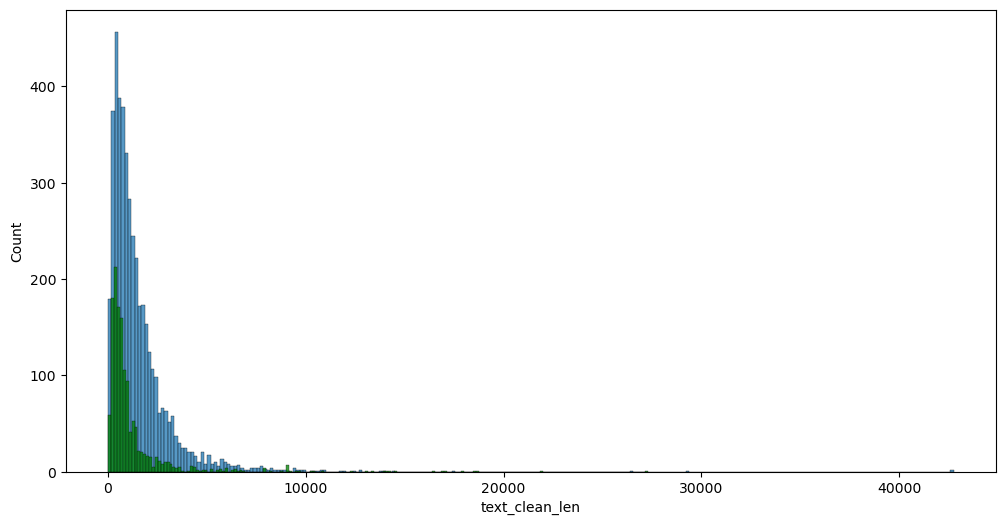

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['text_clean_len'])
sns.histplot(df[df['spam'] == 1]['text_clean_len'],color='green')

<Axes: xlabel='tokens_len', ylabel='Count'>

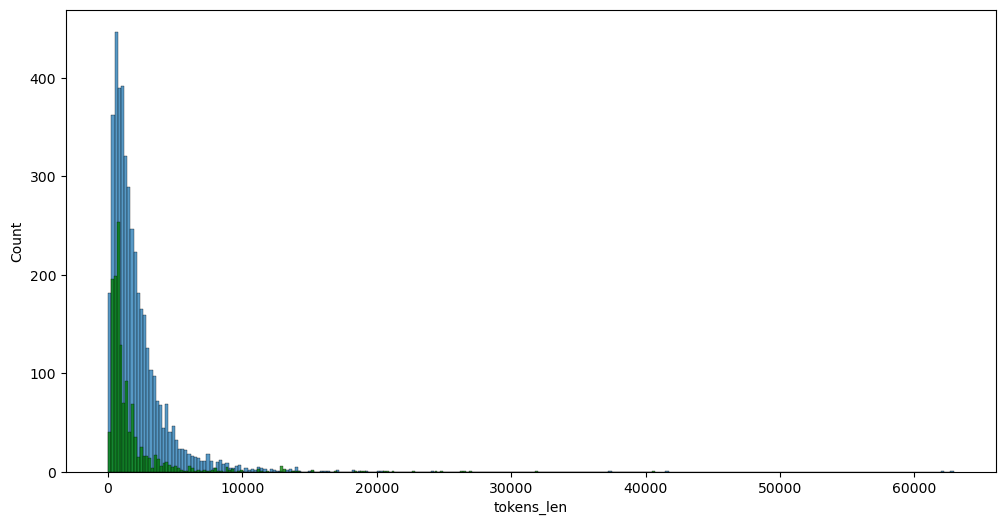

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['tokens_len'])
sns.histplot(df[df['spam'] == 1]['tokens_len'],color='green')

<Axes: xlabel='lemm_len(final)', ylabel='Count'>

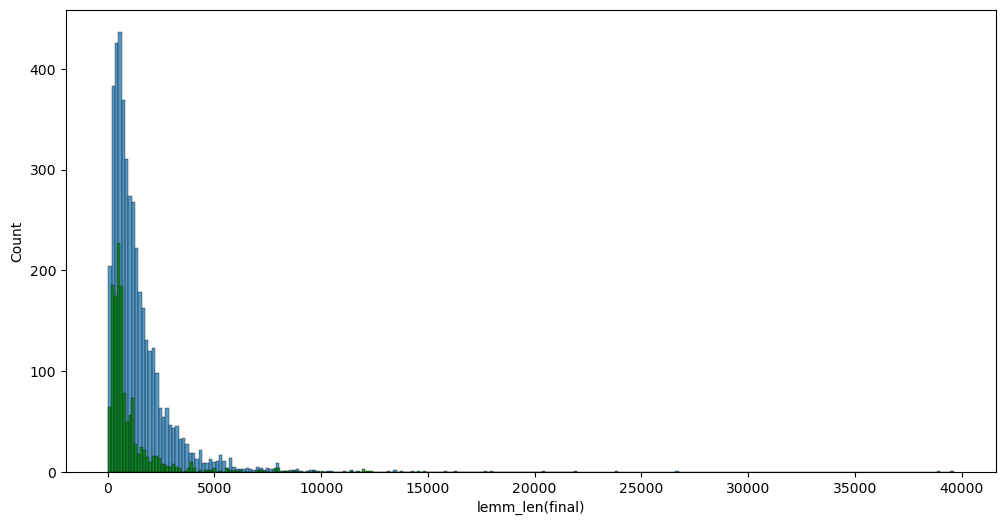

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['lemm_len(final)'])
sns.histplot(df[df['spam'] == 1]['lemm_len(final)'],color='green')

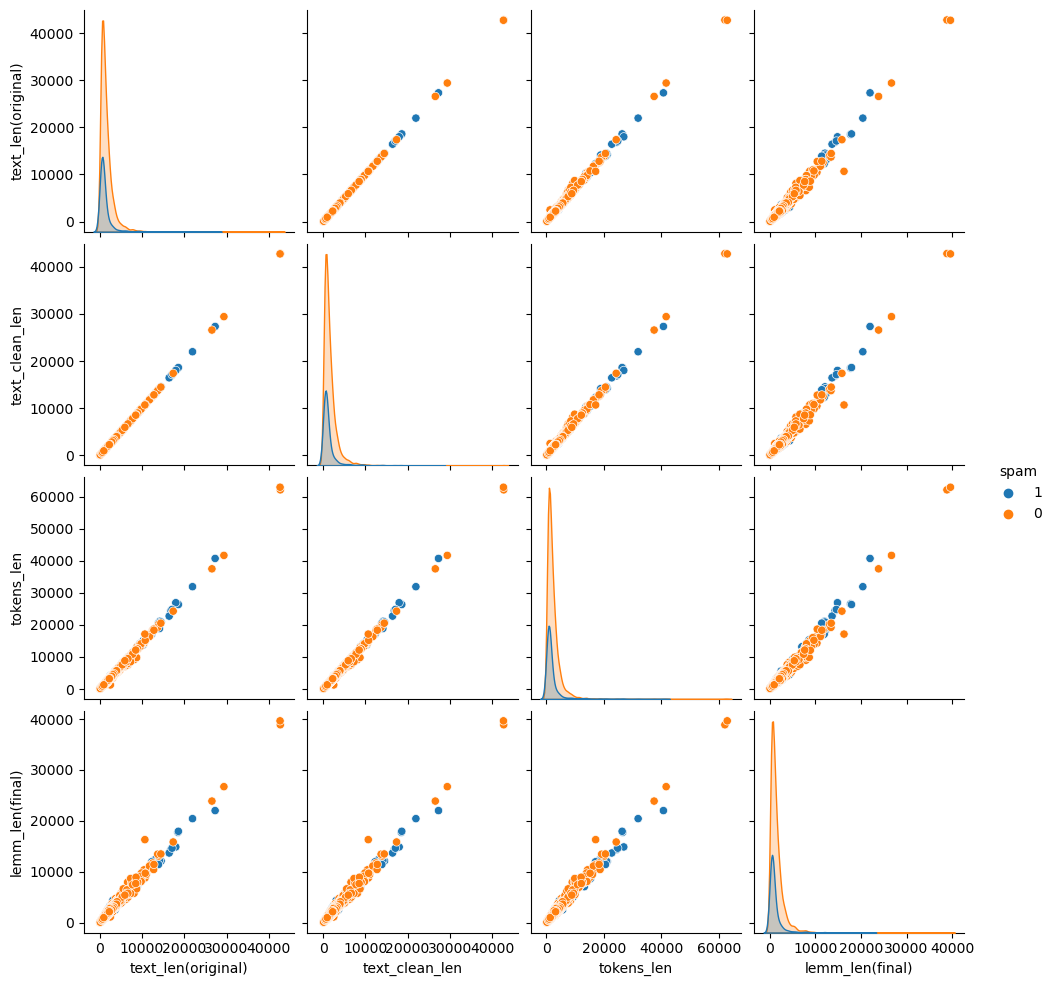

In [38]:
# Convert 'spam' column to string
df['spam'] = df['spam'].astype(str)
sns.pairplot(df,hue='spam')
plt.show()

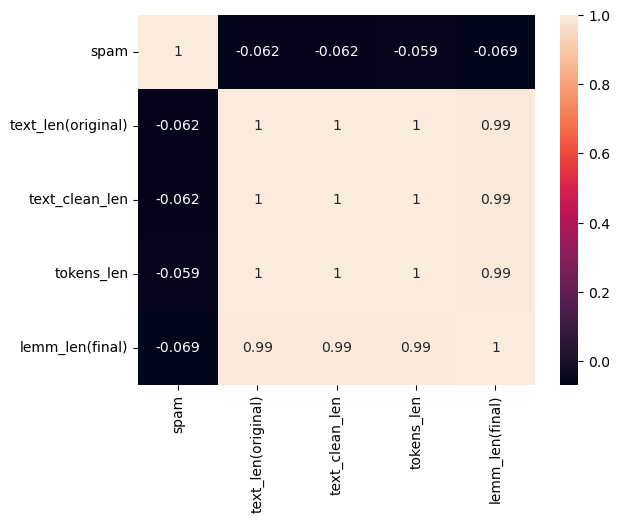

In [39]:
# Convert 'spam' column to numeric
df['spam'] = pd.to_numeric(df['spam'], errors='coerce')

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a heatmap for numeric columns only
sns.heatmap(df[numeric_columns].corr(), annot=True)

# Show the plot
plt.show()


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                5728 non-null   object
 1   spam                5728 non-null   int64 
 2   text_clean          5728 non-null   object
 3   tokens              5728 non-null   object
 4   text_nonstop        5728 non-null   object
 5   text_stemmed        5728 non-null   object
 6   text_lemmatized     5728 non-null   object
 7   text_len(original)  5728 non-null   int64 
 8   text_clean_len      5728 non-null   int64 
 9   tokens_len          5728 non-null   int64 
 10  lemm_len(final)     5728 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 492.4+ KB


In [41]:
df.describe(include =['object'])

,text,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized
count,5728,5728,5728,5728,5728,5728
unique,5695,5694,5522,5521,5521,5521
top,"Subject: re : contact info glenn , please , ...",Subject vp director count for the research gr...,"[Subject, technical, analysis, more, fallout, ...","[Subject, schedule, vince, schedule, risk, 200...","[subject, schedul, vinc, schedul, risk, 2001, ...","[subject, schedul, vinc, schedul, risk, 2001, ..."
freq,2,2,2,2,2,2


### Sentiment Intensity of 'spam' class

In [42]:
# Flatten the lists in the 'tokens' column
flat_words = [word for sublist in df['tokens'] for word in sublist]

# Get the unique words and calculate their lengths
unique_words = pd.Series(flat_words).unique()
unique_words,len(unique_words)

(array(['Subject', 'naturally', 'irresistible', ..., 'toughest', 'critic',
        'desiring'], dtype=object),
 37368)

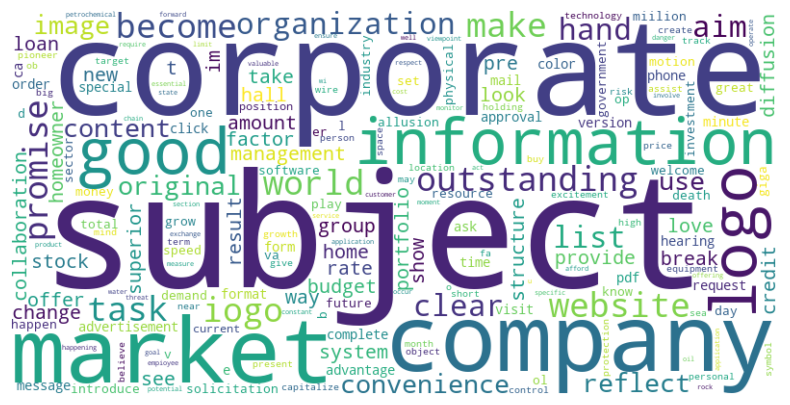

In [43]:
# Create a string of all words
all_words = ' '.join(unique_words)


# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Check of word analysis using wordcloud under "not spam" label

In [44]:
test_df = pd.DataFrame()
test_df = df[df['spam']== 0]
test_df1 = test_df.reset_index(drop = 'True')
test_df1

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized,text_len(original),text_clean_len,tokens_len,lemm_len(final)
0,"Subject: hello guys , i ' m "" bugging you "" f...",0,Subject hello guys i m bugging you for yo...,"[Subject, hello, guys, i, m, bugging, you, for...","[Subject, hello, guys, bugging, completed, que...","[subject, hello, guy, bug, complet, questionna...","[subject, hello, guy, bug, complet, questionna...",1137,1137,1633,1041
1,Subject: sacramento weather station fyi - - ...,0,Subject sacramento weather station fyi ...,"[Subject, sacramento, weather, station, fyi, f...","[Subject, sacramento, weather, station, fyi, f...","[subject, sacramento, weather, station, fyi, f...","[subject, sacramento, weather, station, fyi, f...",1871,1871,2638,1734
2,Subject: from the enron india newsdesk - jan 1...,0,Subject from the enron india newsdesk jan 18 ...,"[Subject, from, the, enron, india, newsdesk, j...","[Subject, enron, india, newsdesk, jan, 18, th,...","[subject, enron, india, newsdesk, jan, 18, th,...","[subject, enron, india, newsdesk, jan, 18, th,...",7647,7647,11023,7004
3,Subject: re : powerisk 2001 - your invitation ...,0,Subject re powerisk 2001 your invitation an...,"[Subject, re, powerisk, 2001, your, invitation...","[Subject, powerisk, 2001, invitation, angelika...","[subject, powerisk, 2001, invit, angelika, tha...","[subject, powerisk, 2001, invit, angelika, tha...",3532,3532,4935,3368
4,Subject: re : resco database and customer capt...,0,Subject re resco database and customer captur...,"[Subject, re, resco, database, and, customer, ...","[Subject, resco, database, customer, capture, ...","[subject, resco, databas, custom, captur, stev...","[subject, resco, databas, custom, captur, stev...",5235,5235,7555,4773
...,...,...,...,...,...,...,...,...,...,...,...
4355,Subject: re : research and development charges...,0,Subject re research and development charges t...,"[Subject, re, research, and, development, char...","[Subject, research, development, charges, gpg,...","[subject, research, develop, charg, gpg, forwa...","[subject, research, develop, charg, gpg, forwa...",1076,1076,1498,1124
4356,"Subject: re : receipts from visit jim , than...",0,Subject re receipts from visit jim thanks ...,"[Subject, re, receipts, from, visit, jim, than...","[Subject, receipts, visit, jim, thanks, invita...","[subject, receipt, visit, jim, thank, invit, v...","[subject, receipt, visit, jim, thank, invit, v...",1096,1096,1519,1183
4357,Subject: re : enron case study update wow ! a...,0,Subject re enron case study update wow all ...,"[Subject, re, enron, case, study, update, wow,...","[Subject, enron, case, study, update, wow, day...","[subject, enron, case, studi, updat, wow, day,...","[subject, enron, case, studi, updat, wow, day,...",1954,1954,2720,1898
4358,"Subject: re : interest david , please , call...",0,Subject re interest david please call shi...,"[Subject, re, interest, david, please, call, s...","[Subject, interest, david, please, call, shirl...","[subject, interest, david, pleas, call, shirle...","[subject, interest, david, plea, call, shirley...",947,947,1292,986


In [45]:
# Flatten the lists in the 'tokens' column
flat_words1 = [word for sublist in test_df1['tokens'] for word in sublist]

# Get the unique words and calculate their lengths
unique_words1 = pd.Series(flat_words1).unique()
unique_words1,len(unique_words1)


(array(['Subject', 'hello', 'guys', ..., 'critic', 'desiring',
        'universally'], dtype=object),
 27112)

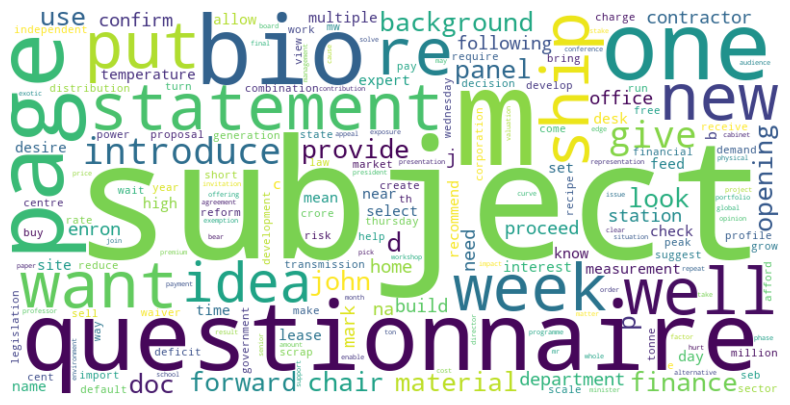

In [46]:
# Create a string of all words
all_words = ' '.join(unique_words1)


# Generate the WordCloud
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Check of word analysis using wordcloud under "spam" label

In [47]:
test_dff = pd.DataFrame()
test_dff = df[df['spam']== 1]
test_df2 = test_dff.reset_index(drop = 'True')
test_df2

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized,text_len(original),text_clean_len,tokens_len,lemm_len(final)
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"[Subject, naturally, irresistible, your, corpo...","[Subject, naturally, irresistible, corporate, ...","[subject, natur, irresist, corpor, ident, lt, ...","[subject, natur, irresist, corpor, ident, lt, ...",1348,1348,1767,1119
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"[Subject, the, stock, trading, gunslinger, fan...","[Subject, stock, trading, gunslinger, fanny, m...","[subject, stock, trade, gunsling, fanni, merri...","[subject, stock, trade, gunsling, fanni, merri...",597,597,865,658
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"[Subject, unbelievable, new, homes, made, easy...","[Subject, unbelievable, new, homes, made, easy...","[subject, unbeliev, new, home, made, easi, im,...","[subject, unbeliev, new, home, made, easi, im,...",440,440,665,390
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"[Subject, 4, color, printing, special, request...","[Subject, 4, color, printing, special, request...","[subject, 4, color, print, special, request, a...","[subject, 4, color, print, special, request, a...",475,475,671,502
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"[Subject, do, not, have, money, get, software,...","[Subject, money, get, software, cds, software,...","[subject, money, get, softwar, cd, softwar, co...","[subject, money, get, softwar, cd, softwar, co...",222,222,332,176
...,...,...,...,...,...,...,...,...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,Subject are you ready to get it hello viag...,"[Subject, are, you, ready, to, get, it, hello,...","[Subject, ready, get, hello, viagra, 1, med, s...","[subject, readi, get, hello, viagra, 1, med, s...","[subject, readi, get, hello, viagra, 1, med, s...",331,331,494,309
1364,Subject: would you like a $ 250 gas card ? do...,1,Subject would you like a 250 gas card don ...,"[Subject, would, you, like, a, 250, gas, card,...","[Subject, would, like, 250, gas, card, let, cu...","[subject, would, like, 250, ga, card, let, cur...","[subject, would, like, 250, ga, card, let, cur...",182,182,280,172
1365,"Subject: immediate reply needed dear sir , i...",1,Subject immediate reply needed dear sir i a...,"[Subject, immediate, reply, needed, dear, sir,...","[Subject, immediate, reply, needed, dear, sir,...","[subject, immedi, repli, need, dear, sir, dr, ...","[subject, immedi, repli, need, dear, sir, dr, ...",3114,3114,4576,2582
1366,Subject: wanna see me get fisted ? fist bang...,1,Subject wanna see me get fisted fist bang w...,"[Subject, wanna, see, me, get, fisted, fist, b...","[Subject, wanna, see, get, fisted, fist, bang,...","[subject, wanna, see, get, fist, fist, bang, s...","[subject, wanna, see, get, fist, fist, bang, s...",722,722,1095,590


In [48]:
# Flatten the lists in the 'tokens' column
flat_words2 = [word for sublist in test_df2['tokens'] for word in sublist]

# Get the unique words and calculate their lengths
unique_words2 = pd.Series(flat_words2).unique()
unique_words2,len(unique_words2)


(array(['Subject', 'naturally', 'irresistible', ..., 'launches',
        'augmented', 'garner'], dtype=object),
 18827)

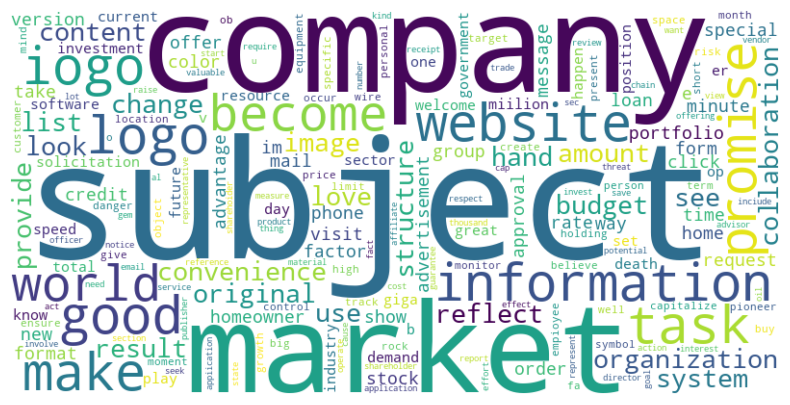

In [49]:
# Create a string of all words
all_words = ' '.join(unique_words2)


# Generate the WordCloud
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

### Spam words frequency under 'spam' label

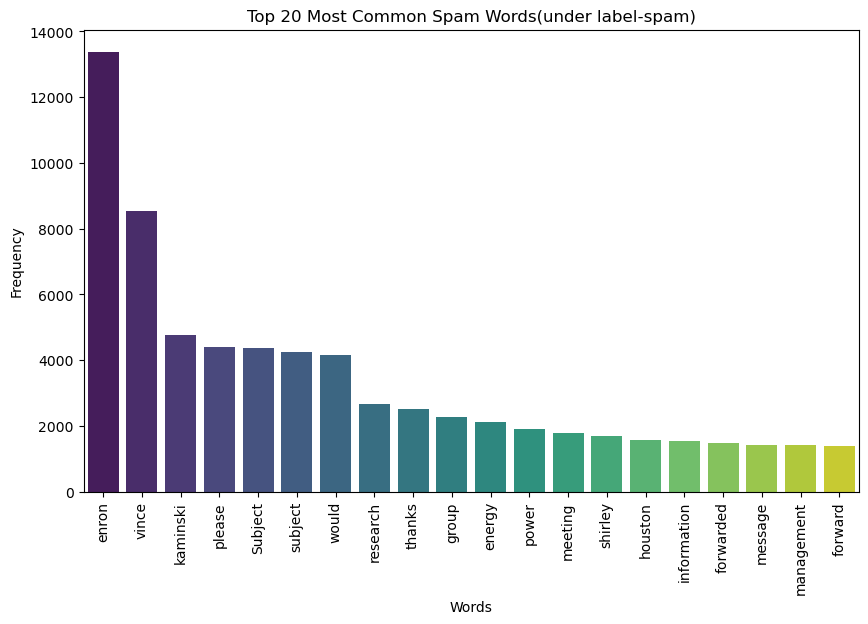

In [50]:

list1 = [word for sublist in test_df1['text_nonstop'] for word in sublist]

# Filter out words with length less than or equal to 4
filtered_words1 = [word for word in list1 if len(word) > 4]

# Create a Counter to count word frequencies
word_counter = Counter(filtered_words1)

# Get the most common (spam) words and their frequencies
most_common_spam_words = word_counter.most_common(20)  # Adjust the number as needed

# Create a DataFrame for seaborn
df_most_common_spam_words = pd.DataFrame(most_common_spam_words, columns=['Word', 'Frequency'])

# Plot the bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_most_common_spam_words, palette='viridis')
plt.title('Top 20 Most Common Spam Words(under label-spam)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

### Spam words frequency under 'not spam' label

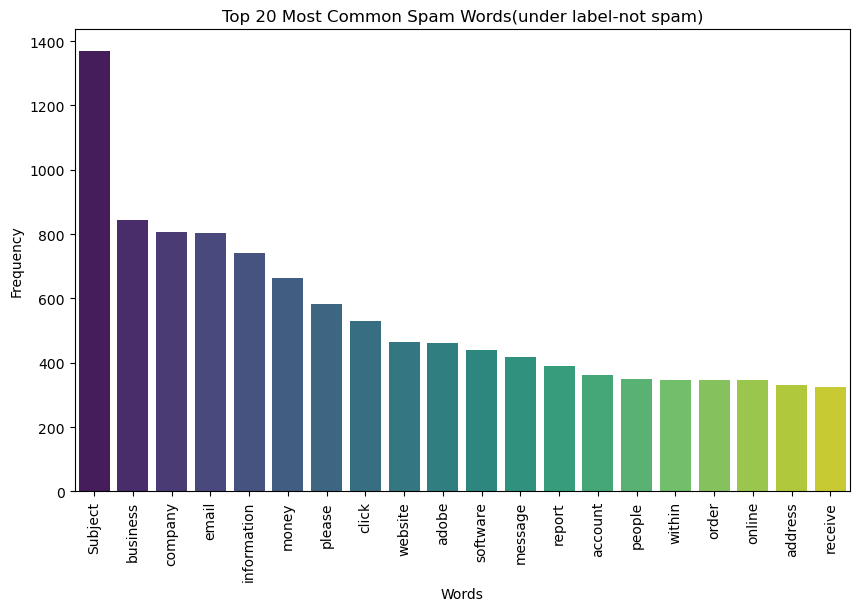

In [51]:

list2 = [word for sublist in test_df2['text_nonstop'] for word in sublist]

# Filter out words with length less than or equal to 4
filtered_words1 = [word for word in list2 if len(word) > 4]

# Create a Counter to count word frequencies
word_counter = Counter(filtered_words1)

# Get the most common (spam) words and their frequencies
most_common_spam_words = word_counter.most_common(20)  # Adjust the number as needed

# Create a DataFrame for seaborn
df_most_common_spam_words = pd.DataFrame(most_common_spam_words, columns=['Word', 'Frequency'])

# Plot the bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_most_common_spam_words, palette='viridis')
plt.title('Top 20 Most Common Spam Words(under label-not spam)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.to_csv('processed_dataset.csv')

### Text Tokenization techniques which are applied later onto ml models 

#### 1.Count Vectorizer based on custom regex pattern

In [53]:
data = pd.read_csv('processed_dataset.csv').drop(['Unnamed: 0'],axis = 1)
data.head()

,text,spam,text_clean,tokens,text_nonstop,text_stemmed,text_lemmatized,text_len(original),text_clean_len,tokens_len,lemm_len(final)
0,Subject: naturally irresistible your corporate...,1,Subject naturally irresistible your corporate ...,"['Subject', 'naturally', 'irresistible', 'your...","['Subject', 'naturally', 'irresistible', 'corp...","['subject', 'natur', 'irresist', 'corpor', 'id...","['subject', 'natur', 'irresist', 'corpor', 'id...",1348,1348,1767,1119
1,Subject: the stock trading gunslinger fanny i...,1,Subject the stock trading gunslinger fanny is...,"['Subject', 'the', 'stock', 'trading', 'gunsli...","['Subject', 'stock', 'trading', 'gunslinger', ...","['subject', 'stock', 'trade', 'gunsling', 'fan...","['subject', 'stock', 'trade', 'gunsling', 'fan...",597,597,865,658
2,Subject: unbelievable new homes made easy im ...,1,Subject unbelievable new homes made easy im w...,"['Subject', 'unbelievable', 'new', 'homes', 'm...","['Subject', 'unbelievable', 'new', 'homes', 'm...","['subject', 'unbeliev', 'new', 'home', 'made',...","['subject', 'unbeliev', 'new', 'home', 'made',...",440,440,665,390
3,Subject: 4 color printing special request add...,1,Subject 4 color printing special request addi...,"['Subject', '4', 'color', 'printing', 'special...","['Subject', '4', 'color', 'printing', 'special...","['subject', '4', 'color', 'print', 'special', ...","['subject', '4', 'color', 'print', 'special', ...",475,475,671,502
4,"Subject: do not have money , get software cds ...",1,Subject do not have money get software cds fr...,"['Subject', 'do', 'not', 'have', 'money', 'get...","['Subject', 'money', 'get', 'software', 'cds',...","['subject', 'money', 'get', 'softwar', 'cd', '...","['subject', 'money', 'get', 'softwar', 'cd', '...",222,222,332,176


In [54]:

df = data
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'])

D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [55]:
df.columns

Index(['text', 'spam', 'text_clean', 'tokens', 'text_nonstop', 'text_stemmed',
       'text_lemmatized', 'text_len(original)', 'text_clean_len', 'tokens_len',
       'lemm_len(final)'],
      dtype='object')

In [56]:
text_counts.shape

(5728, 37030)

In [57]:
# Access the feature names (words) obtained from the text
# feature_names = cv.get_feature_names()

# Access the count matrix (sparse matrix)
count_matrix = text_counts.toarray()

# Convert the count matrix to a DataFrame for better visualization
count_df = pd.DataFrame(count_matrix)

# Now, count_df contains the count of each word in the text data
print(count_df)


      0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5723      0      0      0      0      0      0      0      0      0      0   
5724      0      1      0      0      0      0      0      0      0      0   
5725      0      4      0      0      0      0      0      0      0      0   
5726      0      0      0      0      0      0      0      0      0      0   
5727      0      0      0      0      0      0      0      0      0      0   

      ...  37020  37021  37022  37023  37024  37025  37026  370

#### 2.Word tokenizer

In [58]:
from nltk.tokenize import word_tokenize

text_tokens = df['text'].apply(word_tokenize)
text_tokens,len(text_tokens)

(0       [Subject, :, naturally, irresistible, your, co...
 1       [Subject, :, the, stock, trading, gunslinger, ...
 2       [Subject, :, unbelievable, new, homes, made, e...
 3       [Subject, :, 4, color, printing, special, requ...
 4       [Subject, :, do, not, have, money, ,, get, sof...
                               ...                        
 5723    [Subject, :, re, :, research, and, development...
 5724    [Subject, :, re, :, receipts, from, visit, jim...
 5725    [Subject, :, re, :, enron, case, study, update...
 5726    [Subject, :, re, :, interest, david, ,, please...
 5727    [Subject, :, news, :, aurora, 5, ., 2, update,...
 Name: text, Length: 5728, dtype: object,
 5728)

#### 3.TfidfVectorizer

In [59]:

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=token.tokenize)

# Transform the text data into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])


D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [60]:
tfidf_matrix

<5728x37030 sparse matrix of type '<class 'numpy.float64'>'
	with 529819 stored elements in Compressed Sparse Row format>

In [61]:
# An example

from sklearn.feature_extraction.text import TfidfVectorizer

# Sample emails (replace with your actual email data)
emails = [
    "Congratulations! You've won a free vacation. Claim your prize now!",
    "Important meeting at 3 PM. Please be on time.",
    "Click the link to buy cheap watches.",
    "Meeting agenda for next week attached."
]

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(emails)

# Get the feature names (words) and their corresponding TF-IDF values
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

# Display the results
for i, email in enumerate(emails):
    print(f"Email {i + 1}: {email}")
    for feature, value in zip(feature_names, tfidf_values[i]):
        if value > 0:
            print(f"{feature}: {value}")
    print("\n")


Email 1: Congratulations! You've won a free vacation. Claim your prize now!
claim: 0.3162277660168379
congratulations: 0.3162277660168379
free: 0.3162277660168379
now: 0.3162277660168379
prize: 0.3162277660168379
vacation: 0.3162277660168379
ve: 0.3162277660168379
won: 0.3162277660168379
you: 0.3162277660168379
your: 0.3162277660168379


Email 2: Important meeting at 3 PM. Please be on time.
at: 0.36222392540501064
be: 0.36222392540501064
important: 0.36222392540501064
meeting: 0.2855815033388837
on: 0.36222392540501064
please: 0.36222392540501064
pm: 0.36222392540501064
time: 0.36222392540501064


Email 3: Click the link to buy cheap watches.
buy: 0.3779644730092272
cheap: 0.3779644730092272
click: 0.3779644730092272
link: 0.3779644730092272
the: 0.3779644730092272
to: 0.3779644730092272
watches: 0.3779644730092272


Email 4: Meeting agenda for next week attached.
agenda: 0.4217647821447532
attached: 0.4217647821447532
for: 0.4217647821447532
meeting: 0.3325241986862672
next: 0.421764

### Modelling here we are using TfidfVectorizer as it filters out common stop words, determines the uniqueness across entire document and memory efficient

### Using Logistic Regression

In [62]:
# Separate features and labels
X = df['text']
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:

from nltk.corpus import stopwords
# Tokenize words
def tokenize(text):
    return word_tokenize(text)

# Create a TfidfVectorizer with custom tokenizer and remove stopwords
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords.words('english'))

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Use RandomOverSampler to address class imbalance
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# Train a Logistic Regression classifier with cross-validation and L2 regularization
lr_classifier = LogisticRegression(penalty='l2', random_state=42)

# Train the final model on the resampled data
lr_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
lr_pred = lr_classifier.predict(X_test_tfidf)

acc1 = accuracy_score(y_test,lr_pred)
print("Accuracy (with TfidfVectorizer): ",{acc1})
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))


D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Accuracy (with TfidfVectorizer):  {0.9886561954624782}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



### Using k-fold cross validation

### Logistic Regression

In [64]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (e.g., with k=5)
scores = cross_val_score(lr_classifier, X_train_tfidf, y_train, cv=5)
acc2 = np.mean(scores)
print("Cross-validation scores:", scores)
print("Mean accuracy:", acc2)


Cross-validation scores: [0.96728462 0.9738277  0.96724891 0.96615721 0.95742358]
Mean accuracy: 0.9663884034229712


### Mutlinomial NB

In [65]:

# Separate features and labels
X = df['text']
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize words
def tokenize(text):
    return word_tokenize(text)

# Create a TfidfVectorizer with custom tokenizer and remove stopwords
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords.words('english'))

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Use RandomOverSampler to address class imbalance
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy and display classification report
acc3 = accuracy_score(y_test, y_pred)
print("Improved Accuracy with Word Tokenizer and Sampling:", acc3)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


Improved Accuracy with Word Tokenizer and Sampling: 0.9886561954624782

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



### K-fold cross validation (Multinomial NB)

In [66]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (e.g., with k=5)
scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5)
acc4 = np.mean(scores)
print("Cross-validation scores:", scores)
print("Mean accuracy:", acc4)


Cross-validation scores: [0.85605234 0.84514722 0.85152838 0.84279476 0.85043668]
Mean accuracy: 0.8491918778244989


### Using Over-sampling - involves increasing the number of instances in the minority class and to balance the class distribution, making the model less biased towards the majority class

In [67]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Define oversampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the training data
X_resampled, y_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### Logistic Regression

In [68]:

# Perform cross-validation
cross_val_scores = cross_val_score(lr_classifier, X_resampled, y_resampled,scoring='accuracy')
acc5 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:",acc5 )


Cross-validation scores: [0.98002853 0.9914408  0.98858773 0.98786581 0.98929336]
Mean accuracy: 0.9874432466721854


### Multinomial NB

In [69]:

# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X_resampled, y_resampled,scoring='accuracy')
acc6 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:",acc6 )


Cross-validation scores: [0.99072753 0.99857347 0.99500713 0.99500357 0.99357602]
Mean accuracy: 0.9945775434502153


### Using k-fold and over-sampling (combined/hybrid sampling)

### Logistic Regression

In [70]:

# Perform cross-validation
cross_val_scores = cross_val_score(lr_classifier, X_resampled, y_resampled,cv = cv,scoring='accuracy')
acc7 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:",acc7 )

Cross-validation scores: [0.98644793 0.98787447 0.9914408  0.98643826 0.98786581]
Mean accuracy: 0.9880134527915153


### Multinomial NB

In [71]:

# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X_resampled, y_resampled,cv = cv,scoring='accuracy')
acc8 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:",acc8 )

Cross-validation scores: [0.99643367 0.9914408  0.99500713 0.99428979 0.99286224]
Mean accuracy: 0.9940067263957577


### Using under-sampling - involves reducing the number of instances in the majority class until a more balanced distribution is achieved and also to balance the class distribution, making the model less biased towards the majority class

In [72]:

# Define undersampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train_tfidf, y_train)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


### Logistic Regression

In [73]:


# Perform cross-validation
cross_val_scores = cross_val_score(lr_classifier, X_resampled, y_resampled, scoring='accuracy')
acc9 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", acc9)


Cross-validation scores: [0.97453704 0.96287703 0.97679814 0.95823666 0.97215777]
Mean accuracy: 0.9689213285210965


### Multinomial NB

In [74]:
# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X_resampled, y_resampled, scoring='accuracy')
acc10 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", acc10)


Cross-validation scores: [0.98148148 0.98607889 0.9837587  0.9837587  0.96983759]
Mean accuracy: 0.9809830712382916


### It's Testing time :)

In [75]:

# New examples for testing
new_examples = [
    "Hello Akhil, this is from vnrvjiet do attend classes regularly.",
     "Important security update: Verify your account by clicking the following link: http://verification-site.com",
    "Earn money from your home! Earn 1000/- in few minutes, follow this link.",
    "Hey Jim, don't forgot to attend today's meet as scheduled",
     """
     Hi Akhil,
Every Sunday, get personalized feedback on your applications on Internshala. For each application you make, you will also get access to cover letters of candidates who have been selected for similar roles.
This will help you improve your future applications and increase your chances of getting selected."
     """,
    
    """
    Approved Limit Rs. 3,48,000/-
Your Credit Card
XXXX-0870-XXXX-4008

Ready to Dispatch
Approved Limit Upto

Rs. 3,48,000/-

Verify Now	
akhilnalla62@gmail.com
    """,
    """
    Senior Citizens Savings Scheme Account: Good news! Now Senior Citizens will get monthly benefit of Rs 20500, check scheme details
Article of the day: 27 JAN, 2024
Senior Citizens Savings Scheme : Senior Citizens Savings Scheme has the facility that if you are husband and wife then you can also open a joint account. Husband and wife can also open two separate accounts. Let us know about it in detail.

After retirement, anyone becomes very conscious about their savings. He does not want to invest his life’s hard-earned money in any investment option where there is a fear of loss. The reason for this is that generally an investor around the age of 60 is conservative and does not want to take market risks. For this reason, Senior Citizens Savings Scheme (SCSS), included in the Post Office Small Savings Scheme, is a popular option for senior citizens. Being a post office scheme, there is 100% guarantee of security in it. Now, with the increase in the maximum limit of deposit and the interest earned on it, this scheme has become more attractive than before.
    """
    
]

# Transform the new examples using the same vectorizer
new_examples_tfidf = vectorizer.transform(new_examples)

# Make predictions for the new examples
new_predictions = classifier.predict(new_examples_tfidf)

# Display predictions
for example, prediction in zip(new_examples, new_predictions):
    print(f"Email: {example}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Not Spam'}")
    print("\n")

Email: Hello Akhil, this is from vnrvjiet do attend classes regularly.
Prediction: Not Spam


Email: Important security update: Verify your account by clicking the following link: http://verification-site.com
Prediction: Spam


Email: Earn money from your home! Earn 1000/- in few minutes, follow this link.
Prediction: Spam


Email: Hey Jim, don't forgot to attend today's meet as scheduled
Prediction: Not Spam


Email: 
     Hi Akhil,
Every Sunday, get personalized feedback on your applications on Internshala. For each application you make, you will also get access to cover letters of candidates who have been selected for similar roles.
This will help you improve your future applications and increase your chances of getting selected."
     
Prediction: Not Spam


Email: 
    Approved Limit Rs. 3,48,000/-
Your Credit Card
XXXX-0870-XXXX-4008

Ready to Dispatch
Approved Limit Upto

Rs. 3,48,000/-

Verify Now	
akhilnalla62@gmail.com
    
Prediction: Spam


Email: 
    Senior Citizens Savin

### Using SVM with TfidfVectorizer

In [98]:

df = data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


In [88]:

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)




SVC()

In [89]:

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_tfidf)


In [92]:
# Evaluate the model
acc11 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc11}\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9895287958115183

Confusion Matrix:
[[854   2]
 [ 10 280]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [93]:

# Save the model and vectorizer using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)


### Loading and testing model

In [94]:
filename = "svm_model.pkl"
filename1 = "vect.pkl"

with open(filename, 'rb') as file:
    loaded_model1 = pickle.load(file)


with open(filename1, 'rb') as file:
    vectorizer = pickle.load(file)

In [95]:
import numpy as np

# Reshape y_test to match the number of samples in X_train_tfidf
y_test_reshaped = np.resize(y_test, X_test_tfidf.shape[0])

# Now, you can use y_test_reshaped in the score calculation
accuracy = loaded_model1.score(X_test_tfidf, y_test_reshaped)
print("Accuracy:", accuracy)


Accuracy: 0.9895287958115183


In [99]:

input_mails = [
    "Win a free iPhone X! Click here to claim your prize.",
    "Hey Akhil you have recieved an Assignement complete it by EOD.",
    "Your package is ready for pickup. Click to confirm the delivery.",
    "Unlock exclusive deals: Become a member of our VIP club today.",
    "URGENT: Immediate action required on your account. Click to secure.",
    """
    Hi Akhil,

Good news! ProductizeTech is interested in your application and has sent you an assignment for further evaluation:
New Assignment
Due on: 11 Feb, 2024
Thank you for your interest in our AI Intern (Pre-Placement Offer to top-performing Intern [Remote] ...
View assignment

Submit this assignment on or before due date to increase your chances of getting selected for this opportunity.
    """
]

# Transform new examples using the loaded vectorizer
new_examples_features = tfidf_vectorizer.transform(input_mails)

# Make predictions on the new examples
test_predictions = loaded_model1.predict(new_examples_features)

# Display predictions
for example, prediction in zip(input_mails, test_predictions):
    print(f"{example}")
    print(f"Prediction: {'Spam' if prediction == 1 else 'Not Spam'}")


Win a free iPhone X! Click here to claim your prize.
Prediction: Spam
Hey Akhil you have recieved an Assignement complete it by EOD.
Prediction: Not Spam
Your package is ready for pickup. Click to confirm the delivery.
Prediction: Spam
Unlock exclusive deals: Become a member of our VIP club today.
Prediction: Not Spam
URGENT: Immediate action required on your account. Click to secure.
Prediction: Spam

    Hi Akhil,

Good news! ProductizeTech is interested in your application and has sent you an assignment for further evaluation:
New Assignment
Due on: 11 Feb, 2024
Thank you for your interest in our AI Intern (Pre-Placement Offer to top-performing Intern [Remote] ...
View assignment

Submit this assignment on or before due date to increase your chances of getting selected for this opportunity.
    
Prediction: Not Spam


### Tuning and performance check

In [100]:

# Perform k-fold cross-validation (e.g., with k=5)
scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5)
acc12 = np.mean(scores)
print("Cross-validation scores:", scores)
print("Mean accuracy:", acc12)


Cross-validation scores: [0.98146129 0.98473282 0.98908297 0.98799127 0.98144105]
Mean accuracy: 0.9849418790150148


In [101]:

# Perform cross-validation
cross_val_scores = cross_val_score(svm_classifier, X_resampled, y_resampled,scoring='accuracy')
acc13 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:",acc13 )


Cross-validation scores: [0.98611111 0.97215777 0.98839907 0.96983759 0.98143852]
Mean accuracy: 0.9795888115493684


In [102]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Define oversampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the training data
X_resampled, y_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [103]:

# Perform cross-validation
cross_val_scores = cross_val_score(svm_classifier, X_resampled, y_resampled,cv = cv,scoring='accuracy')
acc14 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:",acc14 )

Cross-validation scores: [0.9957204  0.99714693 0.99643367 0.99857245 0.99928622]
Mean accuracy: 0.9974319341900681


In [104]:

# Define undersampler
undersampler = RandomUnderSampler(random_state=42)

# Undersample the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train_tfidf, y_train)

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [105]:

# Perform cross-validation
cross_val_scores = cross_val_score(svm_classifier, X_resampled, y_resampled,cv = cv,scoring='accuracy')
acc15 = np.mean(cross_val_scores)
# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:",acc15)

Cross-validation scores: [0.98611111 0.97447796 0.98143852 0.99535963 0.98143852]
Mean accuracy: 0.983765145656097


In [114]:
# Example accuracy values
logistic = [acc1, acc2, acc5, acc7, acc9]
multinomial_NB = [acc3, acc4, acc6, acc8,acc10]
svm = [acc11, acc12, acc13, acc14,acc15]


In [107]:
logistic,multinomial_NB ,svm

([0.9886561954624782,
  0.9663884034229712,
  0.9874432466721854,
  0.9880134527915153,
  0.9689213285210965],
 [0.9886561954624782,
  0.8491918778244989,
  0.9945775434502153,
  0.9940067263957577,
  0.9809830712382916],
 [0.9895287958115183,
  0.9849418790150148,
  0.9795888115493684,
  0.9974319341900681,
  0.983765145656097])

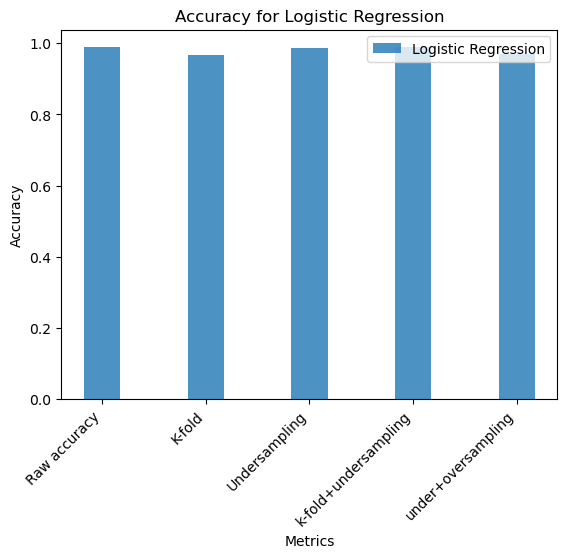

In [125]:
import matplotlib.pyplot as plt
import numpy as np


# List of labels for each algorithm
labels = ['Raw accuracy', 'K-fold', 'Undersampling', 'k-fold+undersampling', 'under+oversampling']

# Set up bar widths and opacity
bar_width = 0.35
opacity = 0.8

# Set up figure and axes
fig, ax = plt.subplots()

# Create bars for each algorithm
index = np.arange(len(labels))

# Bar plots for Logistic Regression
plt.bar(index, logistic, bar_width, alpha=opacity, label='Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Accuracy for Logistic Regression')
plt.xticks(index, labels,fontsize=10, rotation=45, ha='right')
plt.legend()
plt.show()


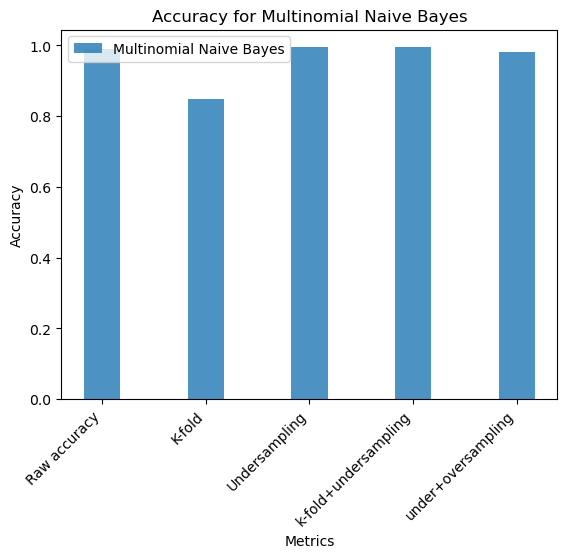

In [126]:

# Bar plots for Multinomial Naive Bayes
plt.bar(index, multinomial_NB, bar_width, alpha=opacity, label='Multinomial Naive Bayes')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Accuracy for Multinomial Naive Bayes')
plt.xticks(index, labels,fontsize=10, rotation=45, ha='right')
plt.legend()
plt.show()


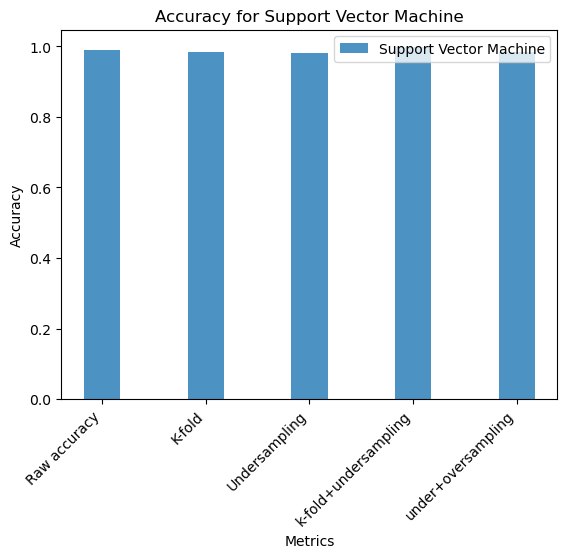

In [127]:

# Bar plots for Support Vector Machine
plt.bar(index, svm, bar_width, alpha=opacity, label='Support Vector Machine')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Accuracy for Support Vector Machine')
plt.xticks(index, labels,fontsize=10, rotation=45, ha='right')
plt.legend()
plt.show()
